In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/predict-concrete-strength/ConcreteStrengthData.csv
/kaggle/input/playground-series-s3e9/sample_submission.csv
/kaggle/input/playground-series-s3e9/train.csv
/kaggle/input/playground-series-s3e9/test.csv


In [2]:
!pip install autoviz

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 64.7/64.7 kB 2.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.5/96.5 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.9/12.9 MB 58.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 60.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 56.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 62.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 68.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 57.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 54.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.3/4.3 MB 45.3 MB/s eta 0:00:00
  Attempting uninstall: panel
    Found existing installation: panel 0.14.3
    Uninstalling panel-0.14.3:
      Successfully uninstalled panel-0.14.3
  Attempting uninstall: holoviews
    Found existing in

# 1. Importing Libraries

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt 
from scipy import stats
from autoviz import data_cleaning_suggestions
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import mutual_info_regression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from catboost import CatBoostRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.tree import ExtraTreeRegressor
from sklearn.model_selection import train_test_split

Imported v0.1.58. After importing, execute '%matplotlib inline' to display charts in Jupyter.
    AV = AutoViz_Class()
    dfte = AV.AutoViz(filename, sep=',', depVar='', dfte=None, header=0, verbose=1, lowess=False,
               chart_format='svg',max_rows_analyzed=150000,max_cols_analyzed=30, save_plot_dir=None)
Update: verbose=0 displays charts in your local Jupyter notebook.
        verbose=1 additionally provides EDA data cleaning suggestions. It also displays charts.
        verbose=2 does not display charts but saves them in AutoViz_Plots folder in local machine.
        chart_format='bokeh' displays charts in your local Jupyter notebook.
        chart_format='server' displays charts in your browser: one tab for each chart type
        chart_format='html' silently saves interactive HTML files in your local machine


# 2. Read Data

In [4]:
train = pd.read_csv('/kaggle/input/playground-series-s3e9/train.csv')
train = train.drop('id' ,axis = 1)
test = pd.read_csv('/kaggle/input/playground-series-s3e9/test.csv')
test = test.drop('id' ,axis = 1)

In [5]:
train.head()

CementComponent  BlastFurnaceSlag  FlyAshComponent  WaterComponent  \
0            525.0               0.0              0.0           186.0   
1            143.0             169.0            143.0           191.0   
2            289.0             134.7              0.0           185.7   
3            304.0              76.0              0.0           228.0   
4            157.0             236.0              0.0           192.0   

   SuperplasticizerComponent  CoarseAggregateComponent  \
0                        0.0                    1125.0   
1                        8.0                     967.0   
2                        0.0                    1075.0   
3                        0.0                     932.0   
4                        0.0                     935.4   

   FineAggregateComponent  AgeInDays  Strength  
0                   613.0          3     10.38  
1                   643.0         28     23.52  
2                   795.3         28     36.96  
3                   670.0        365     39.05  
4                   781.2         90     74.19

# 3. Summary of Data

In [6]:
data_cleaning_suggestions(train)

Data cleaning improvement suggestions. Complete them before proceeding to ML modeling.


# 4. Checking null

In [7]:
train.isna().sum()

CementComponent              0
BlastFurnaceSlag             0
FlyAshComponent              0
WaterComponent               0
SuperplasticizerComponent    0
CoarseAggregateComponent     0
FineAggregateComponent       0
AgeInDays                    0
Strength                     0
dtype: int64

# 5. Descriptive Statistics

In [8]:
train.describe().T.style.background_gradient(cmap='copper')

# 6. Correlation Matrix

<AxesSubplot:>

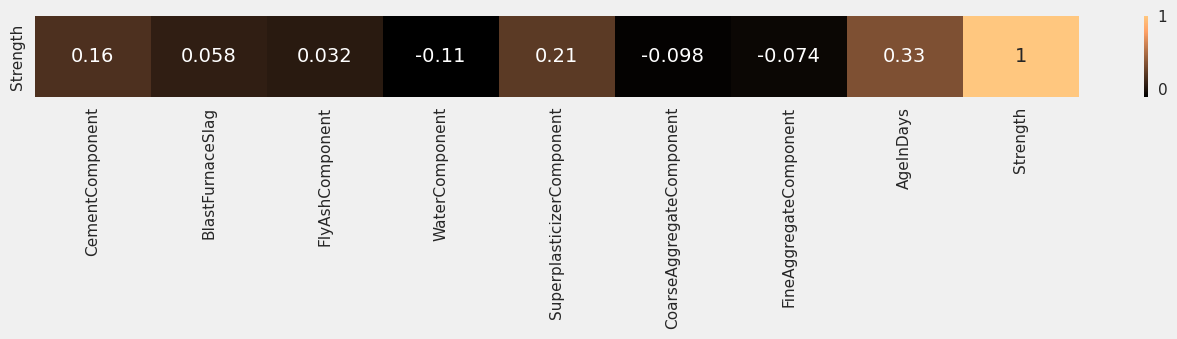

In [9]:
# Pearson Corrleation Matrix
%matplotlib inline
plt.figure(figsize = (15,1))
pea = train.corr(method='pearson').tail(1)
sns.heatmap( pea, cmap = 'copper' ,annot=True)

<AxesSubplot:>

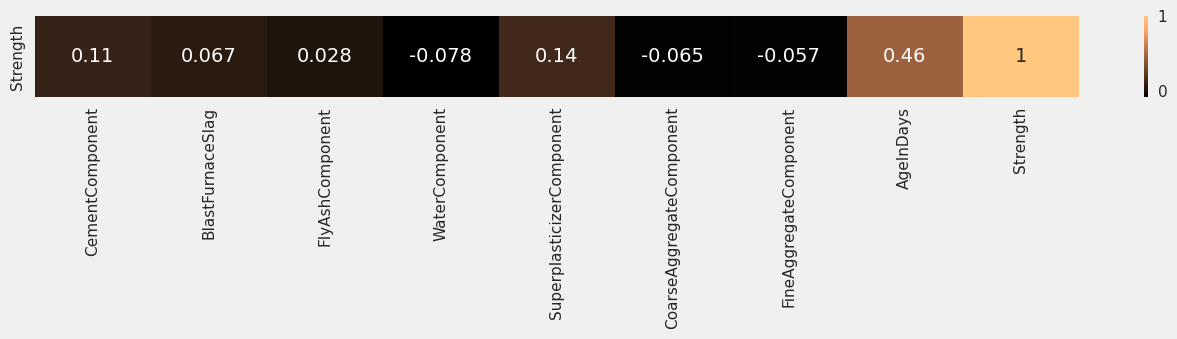

In [10]:
# kendall Corrleation Matrix
%matplotlib inline
plt.figure(figsize = (15,1))
ken = train.corr(method='kendall').tail(1)
sns.heatmap( ken, cmap = 'copper' ,annot=True)

# 7. Plots

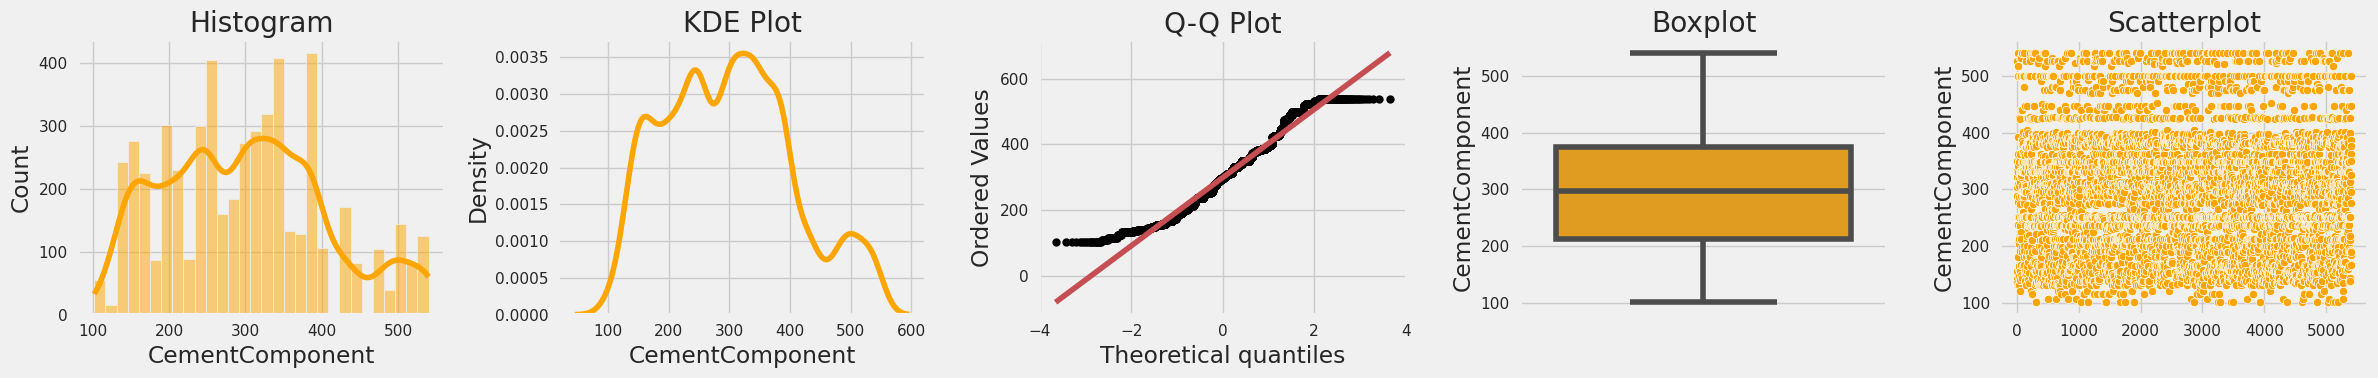

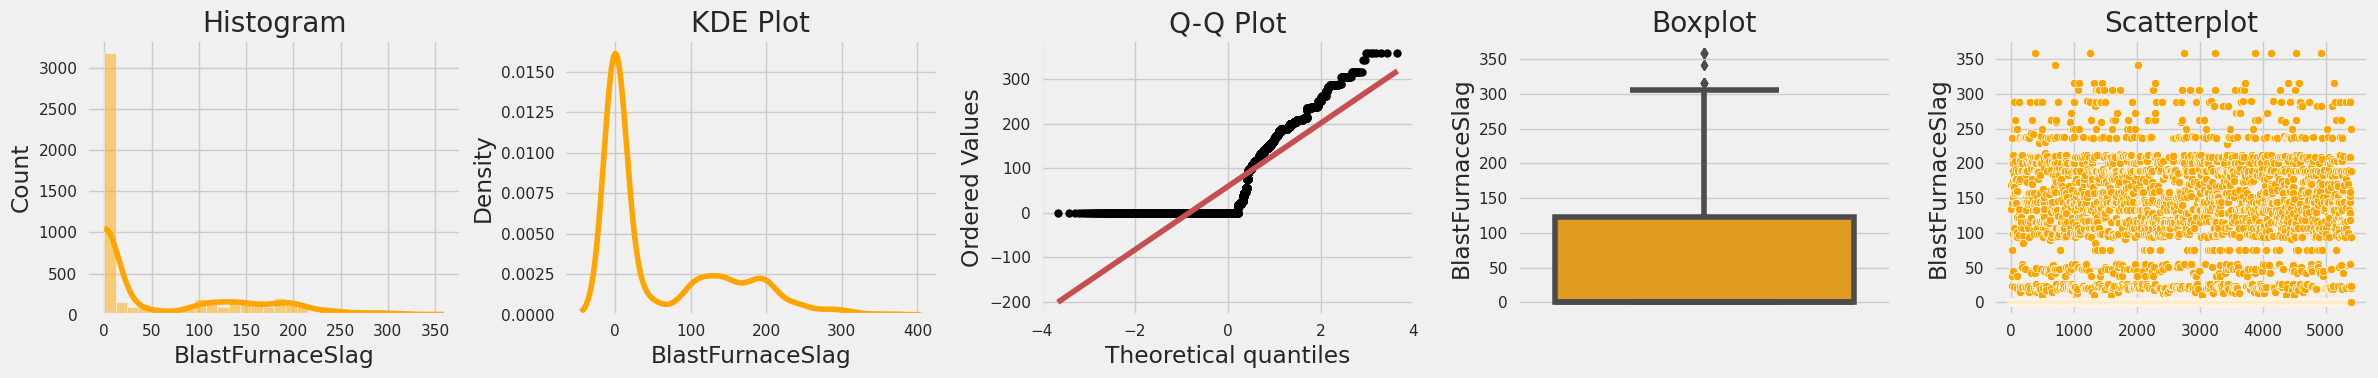

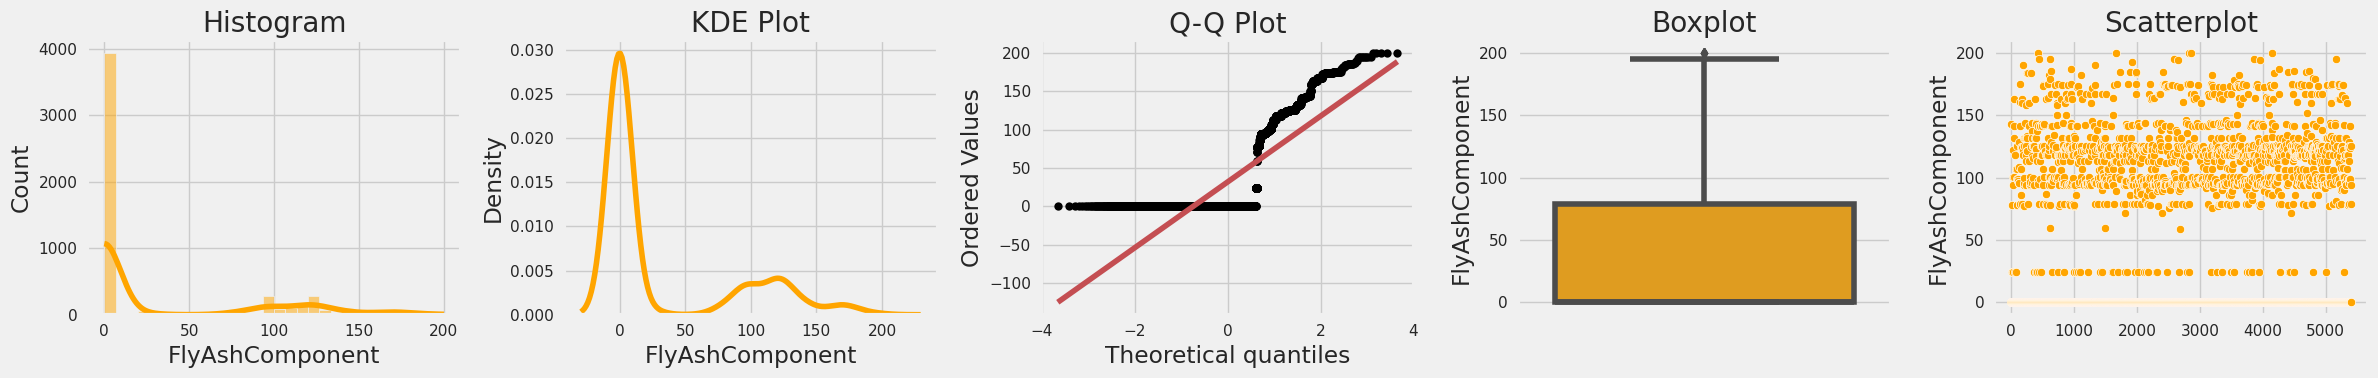

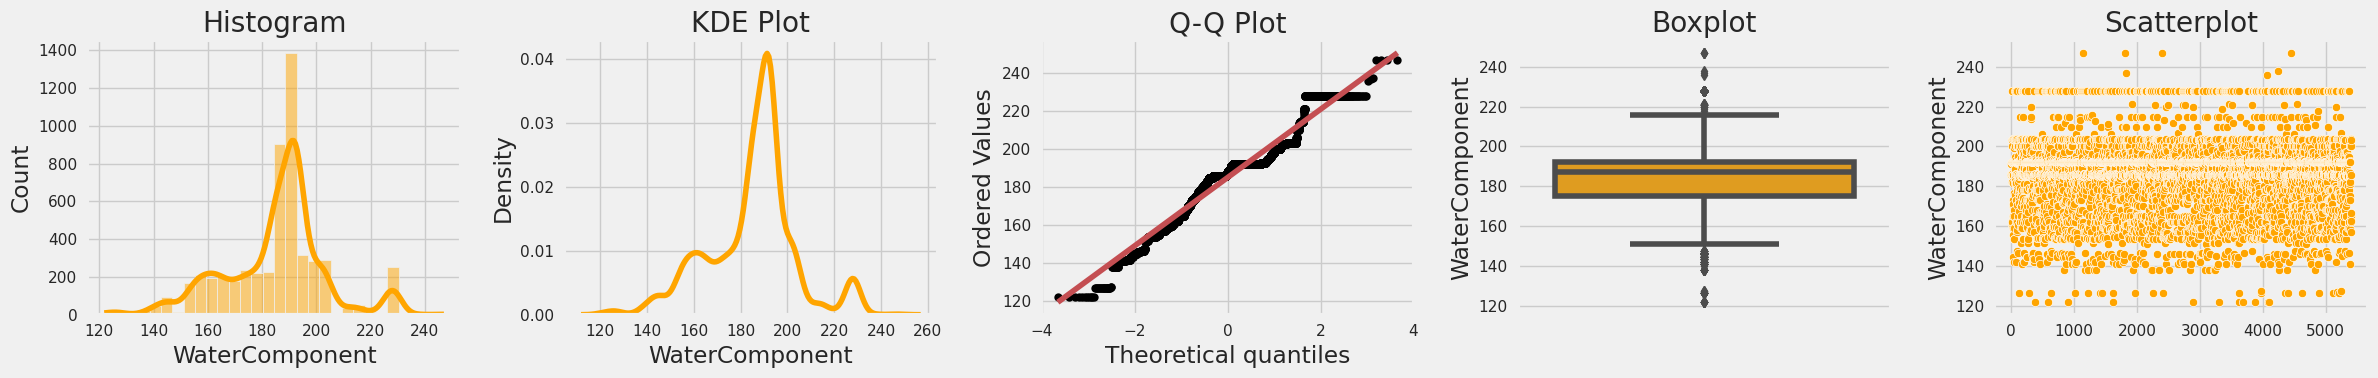

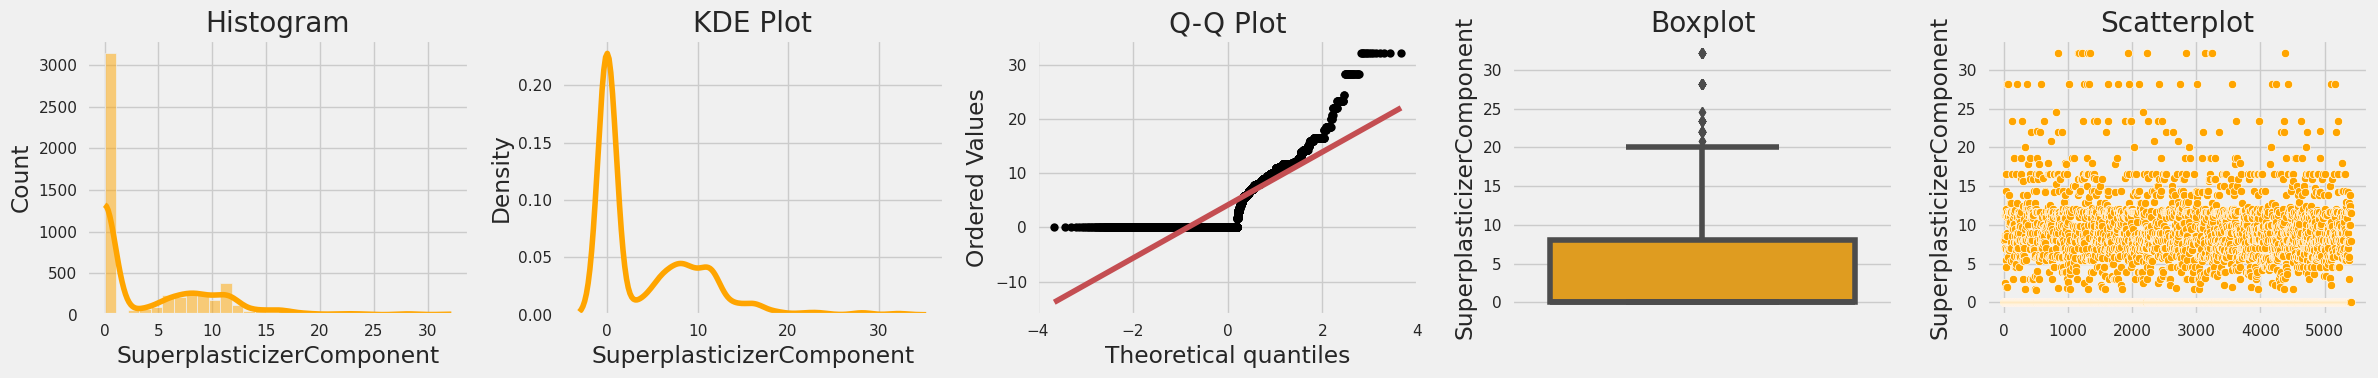

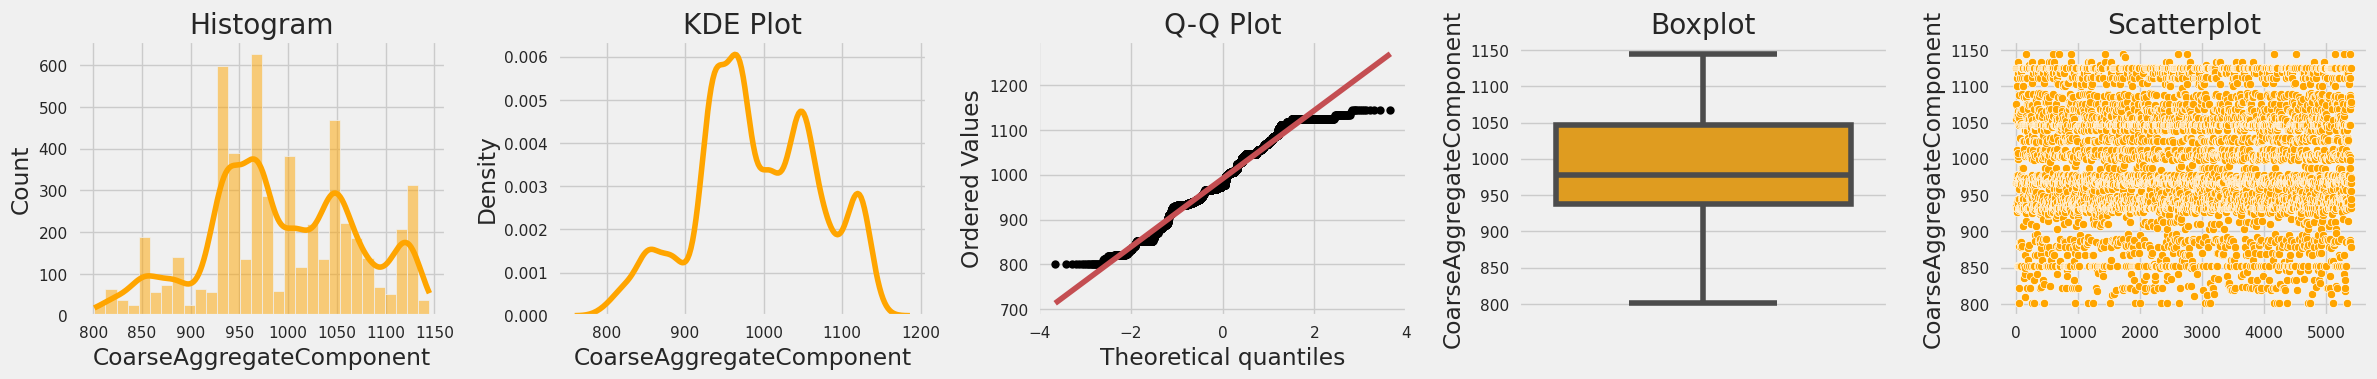

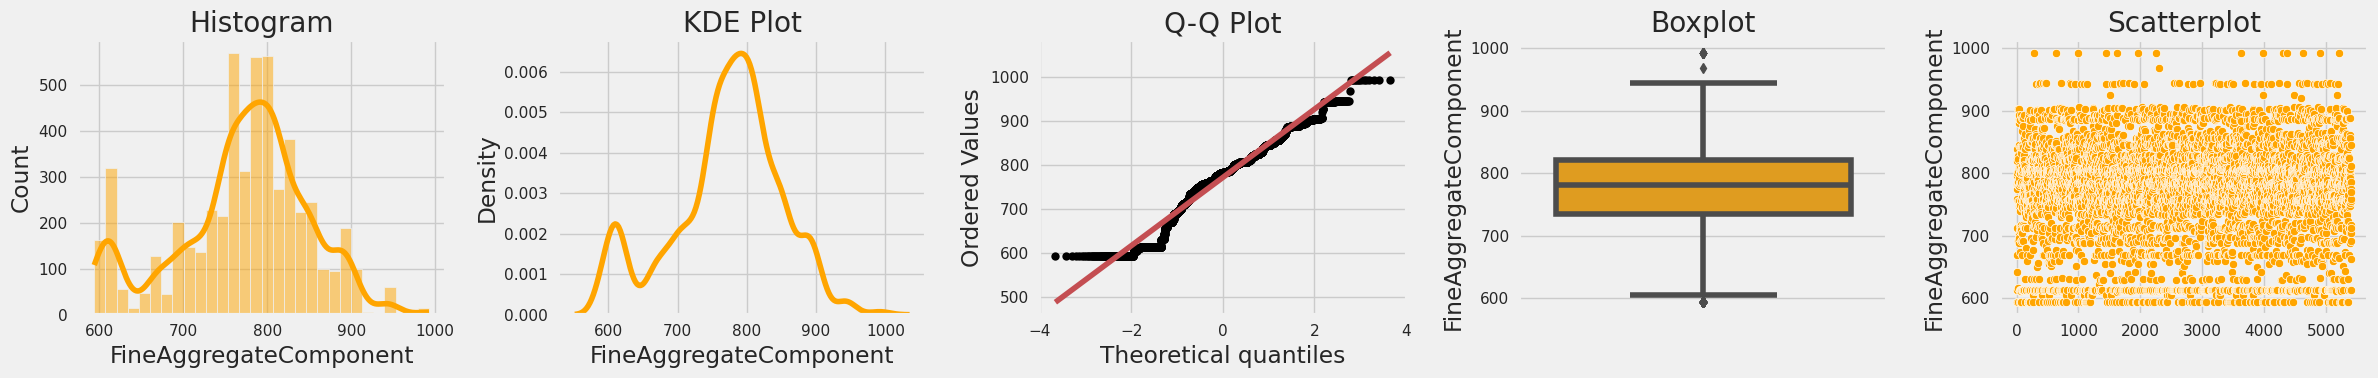

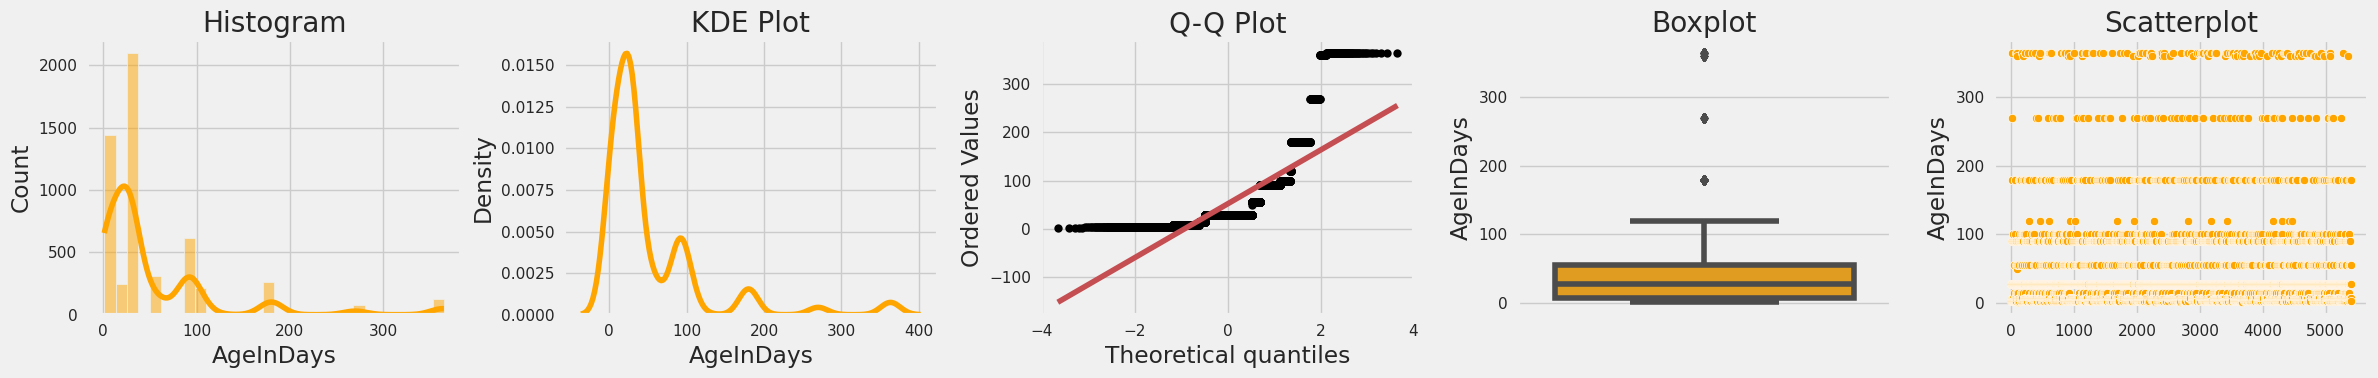

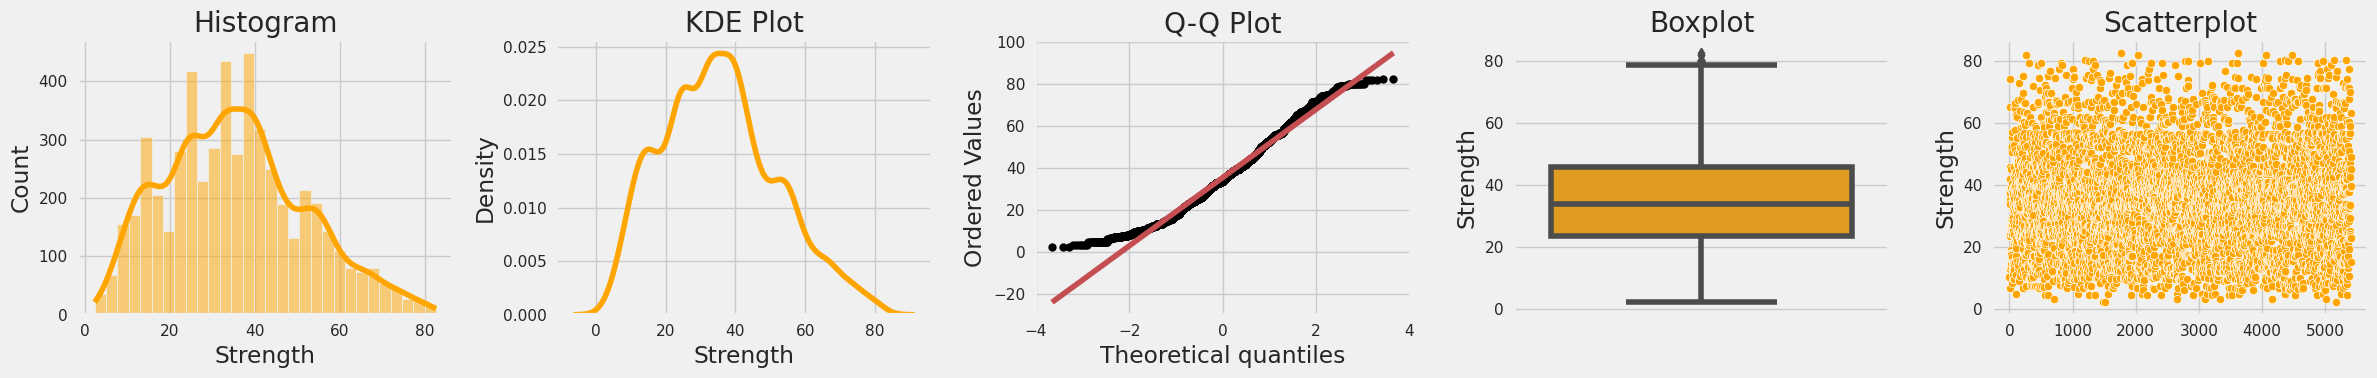

In [11]:
%matplotlib inline
def plots(df, variable):
    # define figure size
    fig, ax = plt.subplots(1, 5, figsize=(24, 4))
    
    # histogram
    sns.histplot(df[variable], bins=30, kde=True, ax=ax[0] ,color='orange')
    ax[0].set_title('Histogram')
    
    # KDE plot
    sns.kdeplot(df[variable], ax=ax[1] ,color = 'orange')
    ax[1].set_title('KDE Plot')
    
    # Q-Q plots
    stats.probplot(df[variable], dist="norm", plot=ax[2] )
    ax[2].lines[0].set_color('orange')
    ax[2].lines[0].set_color('Black')
    ax[2].set_title('Q-Q Plot')
    
    
    # boxplot
    sns.boxplot(y=df[variable], ax=ax[3] ,color = 'orange')
    ax[3].set_title('Boxplot')
    
    # scatterplot
    sns.scatterplot(x=df.index, y=df[variable], ax=ax[4] ,color = 'orange')
    ax[4].set_title('Scatterplot')
    
    plt.tight_layout()
    plt.show()

for i in train.columns:
    plots(train ,i)

# 8. Detecting outliers percentage

In [12]:
def detect_outliers(data):
    outlier_percents = {}
    for column in data.columns:
        q1 = np.quantile(data[column], 0.25)
        q3 = np.quantile(data[column], 0.75)
        iqr = q3 - q1
        lower_bound = q1 - 1.5 * iqr
        upper_bound = q3 + 1.5 * iqr
        outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
        outlier_percent = (outliers.shape[0] / data.shape[0]) * 100
        outlier_percents[column] = outlier_percent
        
    outlier_dataframe = pd.DataFrame(data = outlier_percents.values() ,index=outlier_percents.keys() ,columns=['Outlier_percentage'])
    
    return outlier_dataframe.sort_values(by = 'Outlier_percentage').style.background_gradient(cmap='copper')


detect_outliers(train)


# 9. Skewness Check

In [13]:
def skew(col):
    if ((col < 0.5) & (col > -0.5)):
        return "Normally Distributed"
    elif ((col<1) & (col > 0.5)):
        return "Positively skewed"
    elif (col<-0.5) & (col>-1 ):
        return "Negatively Skewed"
    elif (col < -1):
        return "Highly Negatively Skewed - Do Sqaure Root Transformation"
    elif (col>1):
        return "Highly Positively Skewed - Do Log Transform"
    

skew_data = pd.DataFrame(train.skew() , columns=['Skewness'])
skew_data['Remark'] = skew_data['Skewness'].apply(lambda x : skew(x))


In [14]:
skew_data.style.background_gradient(cmap='copper')

# 10. Handling Skewness

In [15]:
log_tra_list = ['BlastFurnaceSlag' ,'FlyAshComponent' ,'SuperplasticizerComponent' ,'AgeInDays']
for i in log_tra_list:
    train[i] = np.log1p(train[i])

# 11. Feature selection 
>1. VIF - (Variance Inflation Factor)
>2. IG  - (Information Gain)
>3. FS  - (Fisher Score)

<AxesSubplot:>

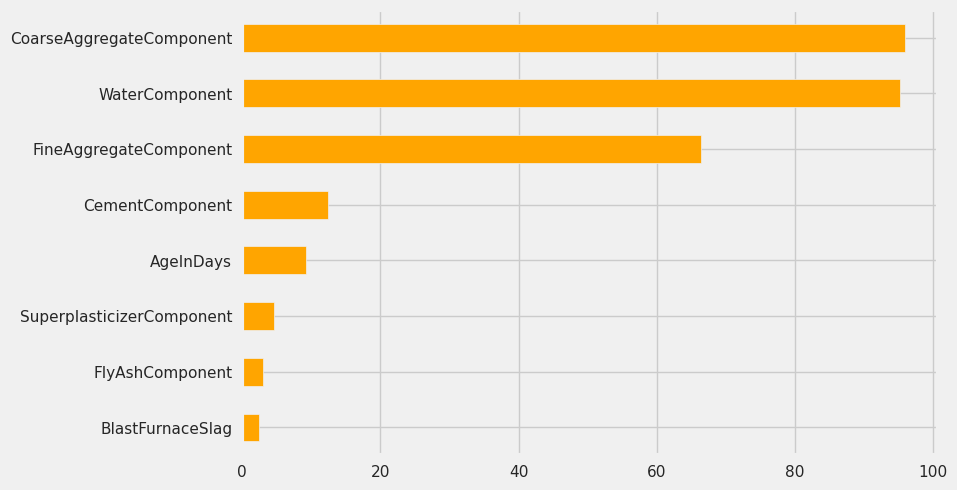

In [16]:
# Multicollinearity test
# VIF - (Variance Inflation Factor)
X = train.drop('Strength' ,axis =1)
y = train['Strength']
vif_list = []
for i in range(len(X.columns)):
    vif = variance_inflation_factor(X.to_numpy() , i)
    vif_list.append(vif)
    
series = pd.Series(vif_list , index = X.columns)
series.sort_values().plot(kind='barh' , color= 'Orange')
# Above 5% values having Multicollinearity we have to remove this---

<AxesSubplot:>

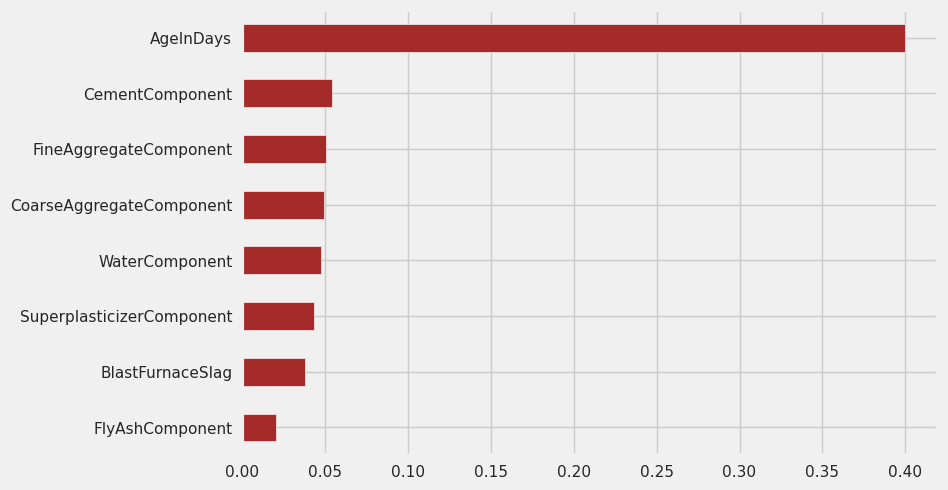

In [17]:
# Information gain
X = train.drop('Strength' ,axis =1)
y = train['Strength']

IG = mutual_info_regression(X,y)
series = pd.Series(IG , index = X.columns)
series.sort_values().plot(kind='barh' ,color = 'brown')
# measures the dependency between variables ,larger numbers indicate greater dependency

# 12. Model building

In [18]:
a = train.drop('Strength' ,axis =1)
b = train['Strength']

In [19]:
X, X_test, y, y_test = train_test_split(a,b)

In [20]:
models = []
k_fold = KFold(n_splits=5, shuffle=True,random_state=42) 
model_list = ["GradientBoostingRegressor" ,"XGBRegressor",'CatBoostRegressor' , "LGBMRegressor"] # you can add more models here
for model in model_list:
    print(model)
    print("*"*70)    
    if model in ["GradientBoostingRegressor" ,"XGBRegressor", "LGBMRegressor"]:
        model = eval(model)
        for i , (train_index, test_index) in enumerate(k_fold.split(X, y)):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            model_ = model()
            model_.fit(X_train,y_train)
            pred = model_.predict(X_test)
            models.append(model_)
            rmse = np.sqrt(mean_squared_error(y_test , pred))
            print("Fold no:",i ,"and RMSE:" ,rmse)
        print("*"*70)
    else:
        model = eval(model)
        for i , (train_index, test_index) in enumerate(k_fold.split(X, y)):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
            y_train, y_test = y.iloc[train_index], y.iloc[test_index]
            model_ = model(verbose=0)
            model_.fit(X_train,y_train)
            pred = model_.predict(X_test)
            models.append(model_)
            rmse = np.sqrt(mean_squared_error(y_test , pred))
            print("Fold no:",i ,"and RMSE:" ,rmse)
        print("*"*70)        

GradientBoostingRegressor
**********************************************************************
Fold no: 0 and RMSE: 12.264314840233581
Fold no: 1 and RMSE: 12.389030173557513
Fold no: 2 and RMSE: 11.465141377329235
Fold no: 3 and RMSE: 12.31439423793875
Fold no: 4 and RMSE: 12.832868379800232
**********************************************************************
XGBRegressor
**********************************************************************
Fold no: 0 and RMSE: 13.14760056316431
Fold no: 1 and RMSE: 13.423285496257835
Fold no: 2 and RMSE: 12.543996357838754
Fold no: 3 and RMSE: 13.387927904511722
Fold no: 4 and RMSE: 13.919625024249163
**********************************************************************
CatBoostRegressor
**********************************************************************
Fold no: 0 and RMSE: 12.502373306461156
Fold no: 1 and RMSE: 12.72069593967222
Fold no: 2 and RMSE: 11.855127418655341
Fold no: 3 and RMSE: 12.747917438478085
Fold no: 4 and RMSE: 12.9676706

# 13. Checking Prediction on separated data

In [21]:

prediction = {}
for pred , model in enumerate(models):
    prediction[pred] = model.predict(X)
      

addition_pred = pd.DataFrame(data = prediction)

model_X = ExtraTreeRegressor() #Here you can try different model or bayesian optimization(in below cell i done ) to adjust weights of each prediction 
# you can easily optimal solution

model_X.fit(addition_pred,y)


prediction = {}
for pred , model in enumerate(models):
    prediction[pred] = model.predict(X_test)
      
# There are total 20 prediction

addition_pred = pd.DataFrame(data = prediction)


rmse = np.sqrt(mean_squared_error(y_test ,model_X.predict(addition_pred)))
print("The rmse on Additional data:" , rmse)

The rmse on Additional data: 7.743925270192182


In [22]:
# from bayes_opt import BayesianOptimization
# def rmse(n_estimators,max_depth,min_samples_split,min_samples_leaf):
#     prediction = {}
#     for pred , model in enumerate(models):
#         prediction[pred] = model.predict(X)


#     addition_pred = pd.DataFrame(data = prediction)

#     model_x = ExtraTreesRegressor(max_depth = int(max_depth) ,
#                                   n_estimators = int(n_estimators) ,
#                                   min_samples_split=int(min_samples_split),
#                                  min_samples_leaf=int(min_samples_leaf))
#     model_x.fit(addition_pred,y)
    
#     prediction = {}
#     for pred , model in enumerate(models):
#         prediction[pred] = model.predict(X_test)
#     addition_pred = pd.DataFrame(data = prediction)
    
#     rmse = mean_squared_error(y_test , model_x.predict(addition_pred),squared=False)
    
#     return -rmse


# pbounds = {'n_estimators': (10, 1000),
#            'max_depth': (1, 50),
#            'min_samples_split': (2, 10),
#            'min_samples_leaf': (1, 10)}

# optimizer = BayesianOptimization(f=rmse, pbounds={'n_estimators': (10, 1000),
#                                                   'max_depth': (1, 50),
#                                                   'min_samples_split': (2, 10),
#                                                   'min_samples_leaf': (1, 10)}, random_state=42)
# optimizer.maximize(init_points=10, n_iter=30)


# print(optimizer.max)
# Try to run this its time consuming thats why i comment out

# 14. Submission

In [23]:
sub = pd.read_csv('/kaggle/input/playground-series-s3e9/sample_submission.csv')
prediction = {}
for pred , model in enumerate(models):
    prediction[pred] = model.predict(test)
      
# There are total 20 prediction
test_pred = pd.DataFrame(data = prediction )

sub['Strength'] = model_X.predict(test_pred)
sub.to_csv('Submission.csv' ,index = False)